In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
#warnings.filterwarnings('ignore') #경고 무시라는데 뭔지 모르겠음

clf = DecisionTreeClassifier()

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11,stratify = iris_data.target)

In [3]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [4]:
from sklearn.tree import export_graphviz

export_graphviz(clf, out_file = "tree.dot", class_names = iris_data.target_names,
               feature_names = iris_data.feature_names, impurity = True, filled = True)#impurity : gini 계수 출력 여부

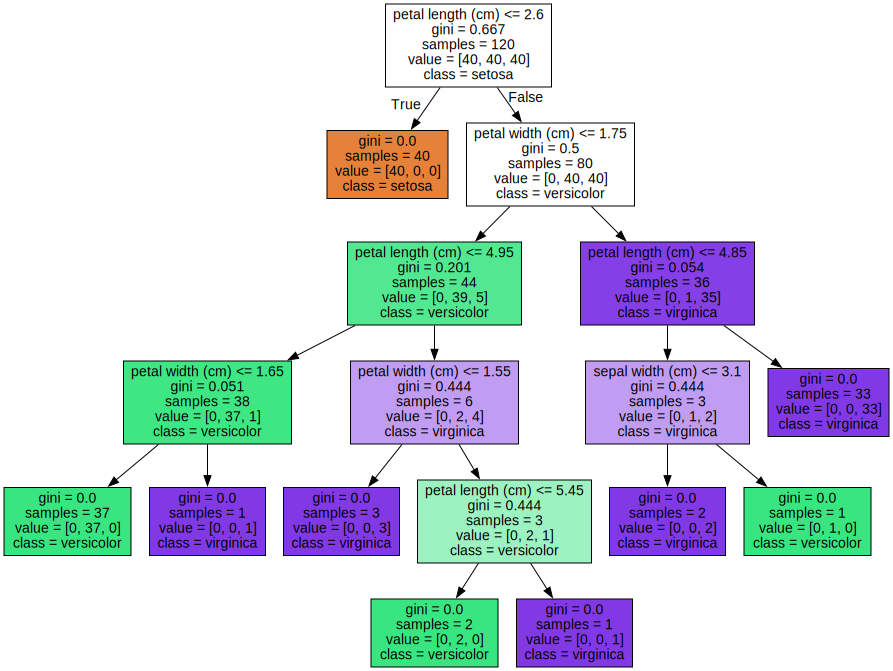

In [20]:
import graphviz
with open("tree.dot2") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importance:
[0.    0.017 0.577 0.406]
sepal length (cm) : 0.000
sepal width (cm) : 0.017
petal length (cm) : 0.577
petal width (cm) : 0.406


<AxesSubplot:>

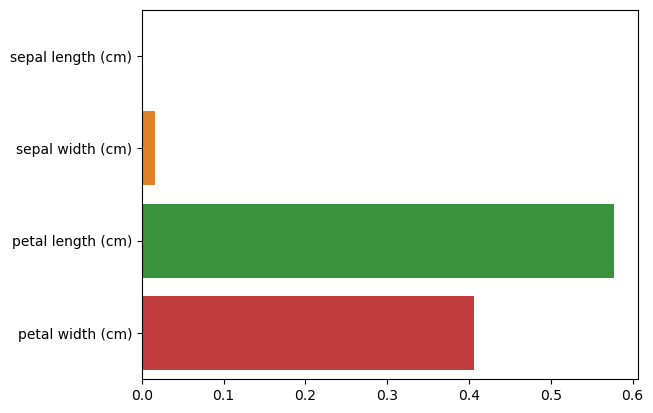

In [25]:
import seaborn as sns
import numpy as np
%matplotlib inline

print("Feature importance:\n{0}".format(np.round(clf.feature_importances_,3)))

for name, value in zip(iris_data.feature_names, clf.feature_importances_):
    print("{0} : {1:.3f}".format(name, value))
    
sns.barplot(x = clf.feature_importances_, y = iris_data.feature_names)

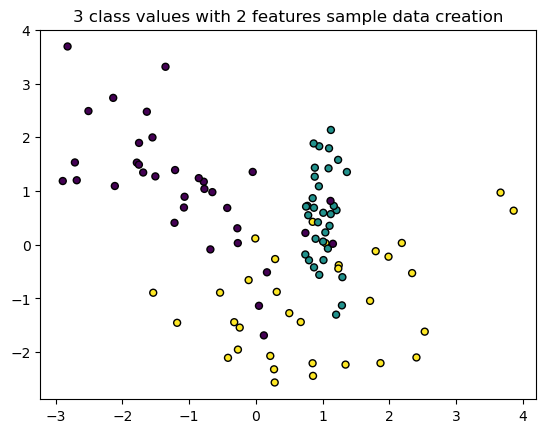

In [29]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 class values with 2 features sample data creation")

X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, 
                                          n_classes = 3, n_clusters_per_class = 1, random_state = 0)
plt.scatter(X_features[:,0], X_features[:,1], marker = 'o', c = y_labels, s = 25, edgecolor = 'k')

## DecisionTreeClassifier

### parameters

max_depth : 최대 트리 깊이
min_sample_split: 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수
min_samples_leaf: 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값

### attribue

feature_importance_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv('C://Users/user/workplace/Toyprojects/DataSets/HumanActivity/features.txt', sep = '\s+', header = None, 
                          names = ['column_index','column_name'])

In [2]:
feature_name = feature_name_df.iloc[:,1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [3]:
feature_dup_df = feature_name_df.groupby('column_name').count() #특정 column을 groupby하면 나머지 column의 값을 column feature마다 세줌
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [4]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby("column_name").cumcount(), columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how = 'outer') #outer는 합집합, inner는 교집합
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis =1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)
    return new_feature_name_df

In [5]:
import pandas as pd

def get_human_dataset():
    
    feature_name_df = pd.read_csv('C://Users/user/workplace/Toyprojects/DataSets/HumanActivity/features.txt',sep = '\s+', header = None,
                                 names = ['column_index', 'column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    X_train = pd.read_csv('C://Users/user/workplace/Toyprojects/DataSets/HumanActivity/train/X_train.txt',sep = '\s+', header = None,
                                 names = feature_name)
    X_test = pd.read_csv('C://Users/user/workplace/Toyprojects/DataSets/HumanActivity/test/X_test.txt',sep = '\s+', header = None,
                                 names = feature_name)
    y_train = pd.read_csv('C://Users/user/workplace/Toyprojects/DataSets/HumanActivity/train/y_train.txt',sep = '\s+', header = None,
                                 names = ['action'])
    y_test = pd.read_csv('C://Users/user/workplace/Toyprojects/DataSets/HumanActivity/test/y_test.txt',sep = '\s+', header = None,
                                 names = ['action'])
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [6]:
X_train.info()
print(y_train['action'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(random_state = 156)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

label = [1,2,3,4,5,6]
feature_name =  get_new_feature_name_df(feature_name_df)
clf.get_depth()

0.8547675602307431


18

In [59]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 156,
 'splitter': 'best'}

In [60]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[6,8,10,12,16,20,24]}
grid_cv = GridSearchCV(clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


ValueError: Invalid format specifier

In [62]:
print('최고 평균 정확도 수치:{0:0.4f}'.format(grid_cv.best_score_))
print('최적 하이퍼 파라미터',grid_cv.best_params_)

최고 평균 정확도 수치:0.8513
최적 하이퍼 파라미터 {'max_depth': 16}


In [65]:
cv_result_df = pd.DataFrame(grid_cv.cv_results_)
cv_result_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [67]:
params = {'max_depth' : [8,12,16,20], 'min_samples_split':[16,24]}
grid_cv = GridSearchCV(clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('최고 평균 정확도 수치:{0:0.4f}'.format(grid_cv.best_score_))
print('최적 하이퍼 파라미터',grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
최고 평균 정확도 수치:0.8549
최적 하이퍼 파라미터 {'max_depth': 8, 'min_samples_split': 16}


In [71]:
pd.DataFrame(grid_cv.cv_results_)[['param_max_depth','param_min_samples_split','mean_test_score']]

,param_max_depth,param_min_samples_split,mean_test_score
0,8,16,0.854879
1,8,24,0.851342
2,12,16,0.845768
3,12,24,0.846175
4,16,16,0.847127
5,16,24,0.849439
6,20,16,0.848624
7,20,24,0.849167


In [75]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print(round(accuracy,3))

0.872


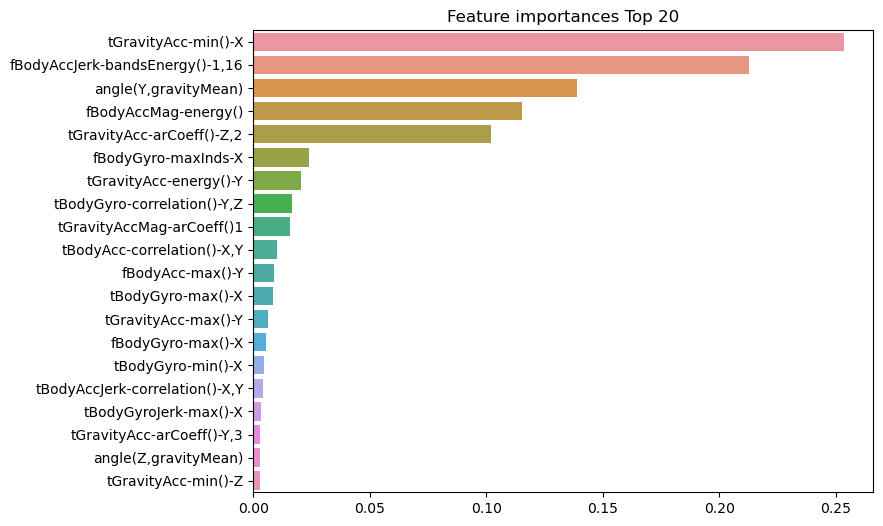

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
plt.figure(figsize = (8,6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()